<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_CZ_Seniority.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [7]:
data_cz_job = data_cz_total[['2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [8]:
data_cz_job.columns.tolist()

['2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [9]:
data_cz_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [10]:
data_cz_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [11]:
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [12]:
np.sort(data_cz_job['Leadership_position'].unique())

array([1., 2., 3., 4.])

In [13]:
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [14]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 9.45443935333192
Interpolated Value: 12.119191459934346
Interpolated Value: 8.903858798453669
Interpolated Value: 10.670013820928489
Interpolated Value: 15.088427304963306
Interpolated Value: 16.270299706986812
Interpolated Value: 12.592177173659687
Interpolated Value: 11.576596208324252
Interpolated Value: 12.269017434823134
Interpolated Value: 1.4169278996865204
Interpolated Value: 1.7916666666666667
Interpolated Value: 1.8131868131868132
Interpolated Value: 1.4515503875968991
Interpolated Value: 1.2
Interpolated Value: 1.2205882352941178
Interpolated Value: 2.2444444444444445
Interpolated Value: 4.0
Interpolated Value: 1.6666666666666667
Interpolated Value: 39.63915857605178
Interpolated Value: 35.46666666666667
Interpolated Value: 37.59411764705882
Interpolated Value: 41.202991452991455
Interpolated Value: 45.41265060240964
Interpolated Value: 44.24193548387097
Interpolated Value: 39.61693548387097
Interpolated Value: 11.571428571428571
Interpolated Value: 46.57

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.5628415300546448
Interpolated Value: 3.7941176470588234
Interpolated Value: 3.859259259259259
Interpolated Value: 2.4285714285714284
Interpolated Value: 4.0
Interpolated Value: nan
Interpolated Value: 3.625
Interpolated Value: 3.659340659340659
Interpolated Value: 3.73972602739726
Interpolated Value: 3.994565217391304
Interpolated Value: 4.117647058823529
Interpolated Value: 4.0814814814814815
Interpolated Value: 3.375
Interpolated Value: 4.0
Interpolated Value: nan
Interpolated Value: 3.3125
Interpolated Value: 3.32967032967033
Interpolated Value: 3.21875
Interpolated Value: 3.172972972972973
Interpolated Value: 3.3823529411764706
Interpolated Value: 3.7037037037037037
Interpolated Value: 4.0
Interpolated Value: 3.111111111111111
Interpolated Value: nan
Interpolated Value: 3.1458333333333335
Interpolated Value: 3.2555555555555555
Interpolated Value: 3.21875
Interpolated Value: 3.3152173913043477
Interpolated Value: 3.6417910447761193
Interpolated Value: 3.5
Inter

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.791208791208791
Interpolated Value: 2.883495145631068
Interpolated Value: 2.9945945945945946
Interpolated Value: 2.8088235294117645
Interpolated Value: 2.4814814814814814
Interpolated Value: 2.0
Interpolated Value: 3.2222222222222223
Interpolated Value: 3.588050314465409
Interpolated Value: 3.5
Interpolated Value: 3.3516483516483517
Interpolated Value: 3.382066276803119
Interpolated Value: 3.369565217391304
Interpolated Value: 3.3582089552238807
Interpolated Value: 3.5407407407407407
Interpolated Value: 3.5
Interpolated Value: 3.3333333333333335
Interpolated Value: 3.518867924528302
Interpolated Value: 3.375
Interpolated Value: 3.1868131868131866
Interpolated Value: 3.2651072124756335
Interpolated Value: 3.2486486486486488
Interpolated Value: 3.393939393939394
Interpolated Value: 3.3805970149253732
Interpolated Value: 3.625
Interpolated Value: 3.6666666666666665
Interpolated Value: 3.157232704402516
Interpolated Value: 3.1875
Interpolated Value: 2.955056179775281


/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 4.015723270440252
Interpolated Value: 3.6458333333333335
Interpolated Value: 3.7252747252747254
Interpolated Value: 3.6653696498054473
Interpolated Value: 3.7027027027027026
Interpolated Value: 3.7205882352941178
Interpolated Value: 4.103703703703704
Interpolated Value: 4.0
Interpolated Value: 3.888888888888889
Interpolated Value: 3.911949685534591
Interpolated Value: 3.4893617021276597
Interpolated Value: 3.5384615384615383
Interpolated Value: 3.603883495145631
Interpolated Value: 3.6467391304347827
Interpolated Value: 3.7794117647058822
Interpolated Value: 3.7925925925925927
Interpolated Value: 3.5
Interpolated Value: 3.7777777777777777
Interpolated Value: 2.8679245283018866
Interpolated Value: 3.0625
Interpolated Value: 2.8461538461538463
Interpolated Value: 2.9765166340508804
Interpolated Value: 3.380434782608696
Interpolated Value: 3.8805970149253732
Interpolated Value: 2.948148148148148
Interpolated Value: 3.0
Interpolated Value: 3.2222222222222223
Interpolate

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.440251572327044
Interpolated Value: 3.6666666666666665
Interpolated Value: 3.318681318681319
Interpolated Value: 3.297087378640777
Interpolated Value: 3.467391304347826
Interpolated Value: 3.6470588235294117
Interpolated Value: 3.3925925925925924
Interpolated Value: 3.625
Interpolated Value: 3.2222222222222223
Interpolated Value: 2.5345911949685536
Interpolated Value: 2.1666666666666665
Interpolated Value: 2.021978021978022
Interpolated Value: 2.1637426900584797
Interpolated Value: 2.8324324324324324
Interpolated Value: 3.2205882352941178
Interpolated Value: 2.4444444444444446
Interpolated Value: 2.375
Interpolated Value: 2.3333333333333335


/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,5.000000,29.000000,1.000000,15.000000,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,5.000000,30.000000,5.000000,10.000000,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,18.960227,11.703488,2.723529,4.931034,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,20.000000,10.000000,2.723529,10.000000,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,20.000000,20.000000,10.000000,3.000000,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.000000,100.000000,17.000000,17.000000,4.000000,2.000000,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.000000,100.000000,18.000000,6.000000,1.000000,9.000000,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.000000,100.000000,22.000000,6.000000,4.000000,8.000000,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.000000,100.000000,5.000000,1.000000,1.000000,1.000000,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [15]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         2.8423913  2.99416342 3.         3.33860759
 4.         5.        ]
Follow_commands : [1.         2.         2.66139241 3.         3.00583658 3.1576087
 4.         5.        ]
Before: Do_differently : [1.         2.         3.         3.41791045 3.60326087 3.6223092
 3.66037736 4.         5.        ]
Do_differently : [1.         2.         2.33962264 2.3776908  2.39673913 2.58208955
 3.         4.         5.        ]
Before: Forced_to_do : [1.         2.         2.73584906 2.88349515 3.         4.
 5.        ]
Forced_to_do : [1.         2.         3.         3.11650485 3.26415094 4.
 5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,5.000000,29.000000,1.000000,15.000000,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,5.000000,30.000000,5.000000,10.000000,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,18.960227,11.703488,2.723529,4.931034,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,20.000000,10.000000,2.723529,10.000000,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,20.000000,20.000000,10.000000,3.000000,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.000000,100.000000,17.000000,17.000000,4.000000,2.000000,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.000000,100.000000,18.000000,6.000000,1.000000,9.000000,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.000000,100.000000,22.000000,6.000000,4.000000,8.000000,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.000000,100.000000,5.000000,1.000000,1.000000,1.000000,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [16]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [17]:
data_cz_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,1.0,3.0,4.0,49.480894,30.542834,5.000000,4.666667,5.00,5.000000,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,1.0,2.0,1.0,46.812612,23.406306,2.333333,3.833333,2.00,3.000000,2.8
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,1.0,2.0,5.0,37.735849,37.735849,3.500000,3.166667,3.75,3.000000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,45.0,4.0,8.652404,1.0,40.000000,100.000000,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
1373,57.0,6.0,12.017228,2.0,40.000000,100.000000,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
1374,40.0,4.0,10.334816,1.0,40.000000,100.000000,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
1375,29.0,4.0,9.613782,2.0,40.000000,100.000000,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


In [18]:
## Taking only academic seniority positions:

# data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]
data_cz_formatted_academic = data_cz_formatted[data_cz_formatted['Current_position'].isin([3., 4., 5., 6.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([3., 4., 5., 6.])

**Contract duration has 7 values, but only 5 possible responses. To remove the "Other" and leave only 1-4?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [19]:
np.sort(data_cz_formatted_academic['Contract_duration'].unique())
data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,560
2.0,268
3.0,15
4.0,8
5.0,4
6.0,3
7.0,1


In [20]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,585
2.0,144
3.0,92
4.0,38


In [21]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Contract_duration']<5].reset_index(drop=True)
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,530
2.0,261
3.0,15
4.0,8


In [22]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,582
2.0,141
3.0,91


In [23]:
data_cz_formatted_academic.to_csv('data_cz_formatted_seniority.csv')
data_cz_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,1.0,3.0,4.0,49.480894,30.542834,5.000000,4.666667,5.00,5.000000,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,1.0,2.0,1.0,46.812612,23.406306,2.333333,3.833333,2.00,3.000000,2.8
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,1.0,2.0,5.0,37.735849,37.735849,3.500000,3.166667,3.75,3.000000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,45.0,4.0,8.652404,1.0,40.000000,100.000000,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
810,57.0,6.0,12.017228,2.0,40.000000,100.000000,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
811,40.0,4.0,10.334816,1.0,40.000000,100.000000,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
812,29.0,4.0,9.613782,2.0,40.000000,100.000000,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


Text(0.5, 1.0, 'Czech Positions')

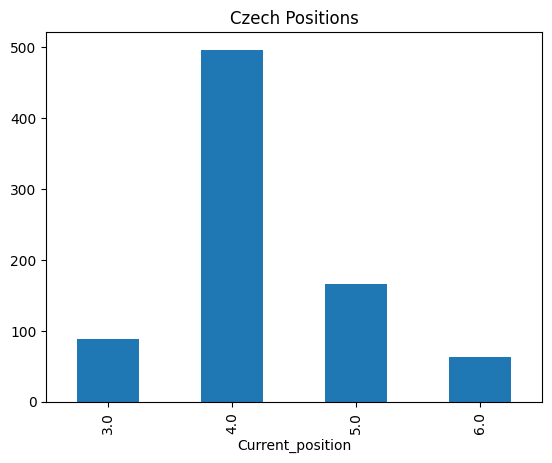

In [24]:
data_cz_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Czech Positions')

In [25]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic_w_dummies = pd.get_dummies(data_cz_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'], drop_first=True)

# print(data_cz_formatted_academic_w_dummies[data_cz_formatted_academic_w_dummies.isna().any(axis=1)])

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.astype(float)

## Calculating the interaction terms for Age moderator:
for col in data_cz_formatted_academic_w_dummies.columns:
  data_cz_formatted_academic_w_dummies[col+'_mod_Age'] = data_cz_formatted_academic_w_dummies[col] * data_cz_formatted_academic_w_dummies['Age']

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_cz_formatted_academic_w_dummies.to_csv('data_cz_formatted_academic_w_dummies.csv')

print(data_cz_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_cz_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Contract_duration_4.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Job_satisfaction_mod_Age', 'Current_position_4.0_mod_Age', 'Current_position_5.0_mod_Age', 'Current_position_6.0_mod_Age', 'Contract_duration_2.0_mod_Age', 'Contract_duration_3.0_mod_Age', 'Contract_duration_4.0_mod_Age', 'Leadership_position_2.0_mod_Age', 'Leadership_p

## Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'CZ Correlation Heatmap')

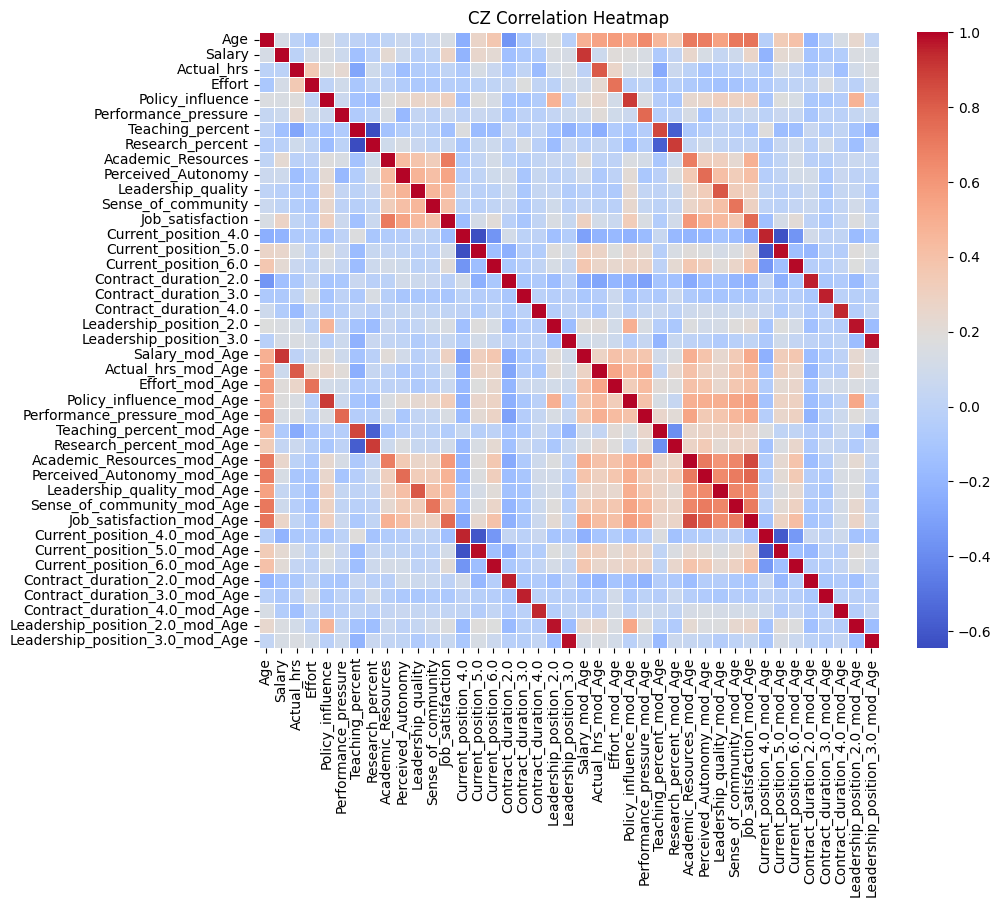

In [26]:
correlations = data_cz_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CZ Correlation Heatmap')

In [27]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_cz_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  9.250000
1  Current_position_4.0  2.588857
2  Current_position_5.0  2.297744
3  Current_position_6.0  1.583105
----------------------------------------
Working Conditions:
                   Variable         VIF
0                     const  100.954467
1                    Salary    1.212024
2                Actual_hrs    1.458007
3                    Effort    1.262269
4          Policy_influence    1.628987
5      Performance_pressure    1.170775
6          Teaching_percent    2.300490
7          Research_percent    2.189452
8        Academic_Resources    1.466298
9        Perceived_Autonomy    1.736573
10       Leadership_quality    1.583214
11       Sense_of_community    1.400196
12    Contract_duration_2.0    1.115186
13    Contract_duration_3.0    1.108585
14    Contract_duration_4.0    1.065358
15  Leadership_position_2.0    1.471961
16  Leadership_position_3.0    1.166760
-------------------------------

## Calculating Cronbach's Alpha for the combined factors:

In [28]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [29]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(data_cz_job_w_inversion['Current_position'].isin([3., 4., 5., 6.])) &
                                                     (data_cz_job_w_inversion['Contract_duration']<5) &
                                                     (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





814
Academic Resources Cronbach Alpha: 0.7996822545593544
Perceived Autonomy Cronbach Alpha: 0.8634504430329117
Leadership Quality Cronbach Alpha: 0.9187755123665797
Sense of Community Cronbach Alpha: 0.86466932148494
---------------------
Job Satisfaction Cronbach Alpha: 0.7855752372408381


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [30]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Contract_duration_4.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [31]:
Current_position_dummy_cols

['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

In [47]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Contract_duration_4.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [48]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

path_no_mod = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_4.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""

path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_4.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""

print('Mediation/Moderation Path Model Specification:')
print(path)
print('-----------------------------------')


Mediation/Moderation Path Model Specification:

Salary ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Actual_hrs ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Effort ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Policy_influence ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Performance_pressure ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Teaching_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Research_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Academic_Resources ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Perceived_Autonomy ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Leadership_quality ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Sense_of_community ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Contract_duration_2.

In [49]:
model = semopy.Model(path)
result = model.fit(data_cz_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 48.802
Number of iterations: 342
Params: 1.885 5.719 7.246 3.602 7.984 6.983 -8.015 -7.067 -5.364 0.415 0.965 1.070 0.346 0.471 0.521 -2.970 -12.747 -17.151 -2.315 0.818 3.638 0.067 0.136 0.408 0.056 0.102 0.353 0.032 -0.020 -0.012 -0.019 -0.033 0.052 -0.229 -0.482 -0.416 -0.039 -0.051 -0.057 -0.013 -0.023 -0.007 0.097 0.273 0.315 0.076 0.158 0.136 0.033 0.002 -0.002 -0.010 0.051 -0.002 -0.004 0.454 0.255 0.069 0.073 0.092 -0.094 0.327 0.213 0.128 -0.082 0.099 0.206 -0.001 -0.000 0.000 0.000 -0.001 0.000 0.000 -0.010 -0.006 -0.002 -0.001 0.021 0.001 -0.003 -0.004 -0.003 0.001 -0.006 -0.004 -0.003 0.566 171.413 0.198 0.018 0.010 1003.951 0.012 0.134 0.097 1.363 0.729 1.042 1.323 287.324 28.961 0.894 468.292


In [50]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF              716.000000
DoF Baseline     803.000000
chi2           39725.026139
chi2 p-value       0.000000
chi2 Baseline  61833.926102
CFI                0.360832
GFI                0.357553
AGFI               0.279490
NFI                0.357553
TLI                0.283168
RMSEA              0.258869
AIC              110.395513
BIC              599.399391
LogLik            48.802243
-------------------------


In [51]:
ins = model.inspect()
print(ins)
ins.to_csv('CZ_Model_Parameter_Values.csv')

                   lval  op                  rval    Estimate   Std. Err  \
0                Salary   ~  Current_position_4.0    1.885392   0.622399   
1                Salary   ~  Current_position_5.0    5.718728   0.709630   
2                Salary   ~  Current_position_6.0    7.245944   0.888152   
3            Actual_hrs   ~  Current_position_4.0    3.602259   1.514187   
4            Actual_hrs   ~  Current_position_5.0    7.983912   1.726405   
..                  ...  ..                   ...         ...        ...   
99     Research_percent  ~~      Research_percent  287.324061  14.242125   
100              Salary  ~~                Salary   28.961498   1.435568   
101  Sense_of_community  ~~    Sense_of_community    0.894499   0.044339   
102    Teaching_percent  ~~      Teaching_percent  468.292471  23.212396   
103    Job_satisfaction  ~~      Job_satisfaction    0.011872   0.000588   

       z-value       p-value  
0     3.029233  2.451756e-03  
1     8.058746  6.661338e

In [52]:
print(ins[ins['p-value']<0.05])

                   lval  op                  rval    Estimate   Std. Err  \
0                Salary   ~  Current_position_4.0    1.885392   0.622399   
1                Salary   ~  Current_position_5.0    5.718728   0.709630   
2                Salary   ~  Current_position_6.0    7.245944   0.888152   
3            Actual_hrs   ~  Current_position_4.0    3.602259   1.514187   
4            Actual_hrs   ~  Current_position_5.0    7.983912   1.726405   
..                  ...  ..                   ...         ...        ...   
99     Research_percent  ~~      Research_percent  287.324061  14.242125   
100              Salary  ~~                Salary   28.961498   1.435568   
101  Sense_of_community  ~~    Sense_of_community    0.894499   0.044339   
102    Teaching_percent  ~~      Teaching_percent  468.292471  23.212396   
103    Job_satisfaction  ~~      Job_satisfaction    0.011872   0.000588   

       z-value       p-value  
0     3.029233  2.451756e-03  
1     8.058746  6.661338e

In [53]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Salary,~,Current_position_4.0,1.885392,0.622399,3.029233,2.451756e-03,**,1.88539**
1,Salary,~,Current_position_5.0,5.718728,0.709630,8.058746,6.661338e-16,***,5.71873***
2,Salary,~,Current_position_6.0,7.245944,0.888152,8.158449,4.440892e-16,***,7.24594***
3,Actual_hrs,~,Current_position_4.0,3.602259,1.514187,2.379005,1.735945e-02,*,3.60226*
4,Actual_hrs,~,Current_position_5.0,7.983912,1.726405,4.624588,3.753444e-06,***,7.98391***
...,...,...,...,...,...,...,...,...,...
99,Research_percent,~~,Research_percent,287.324061,14.242125,20.174241,0.000000e+00,***,287.32406***
100,Salary,~~,Salary,28.961498,1.435568,20.174241,0.000000e+00,***,28.9615***
101,Sense_of_community,~~,Sense_of_community,0.894499,0.044339,20.174241,0.000000e+00,***,0.8945***
102,Teaching_percent,~~,Teaching_percent,468.292471,23.212396,20.174241,0.000000e+00,***,468.29247***


In [54]:

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths.set_index('lval')



,Current_position_4.0,Current_position_5.0,Current_position_6.0
lval,,,
Salary,1.88539**,5.71873***,7.24594***
Actual_hrs,3.60226*,7.98391***,6.98256**
Effort,-8.01483*,-7.06658 (n.s.),-5.36405 (n.s.)
Policy_influence,0.41509**,0.96459***,1.07011***
Performance_pressure,0.34638**,0.4713***,0.52052**
Teaching_percent,-2.96985 (n.s.),-12.74739***,-17.15145***
Research_percent,-2.31491 (n.s.),0.81829 (n.s.),3.63848 (n.s.)
Academic_Resources,0.06676 (n.s.),0.13624 (n.s.),0.40797**
Perceived_Autonomy,0.05571 (n.s.),0.10213 (n.s.),0.35317*


In [55]:
work_cond_paths.set_index('lval').T

lval,Job_satisfaction
Salary,0.03276***
Actual_hrs,0.00193***
Effort,-0.00156***
Policy_influence,-0.0097**
Performance_pressure,0.0511***
Teaching_percent,-0.00152***
Research_percent,-0.00397***
Academic_Resources,0.45425***
Perceived_Autonomy,0.25535***
Leadership_quality,0.0687***


In [56]:
mod_age_paths.set_index('lval').T

lval,Job_satisfaction
Salary_mod_Age,-0.00069***
Actual_hrs_mod_Age,-5e-05***
Effort_mod_Age,3e-05***
Policy_influence_mod_Age,7e-05 (n.s.)
Performance_pressure_mod_Age,-0.00118***
Teaching_percent_mod_Age,2e-05**
Research_percent_mod_Age,9e-05***
Academic_Resources_mod_Age,-0.00969***
Perceived_Autonomy_mod_Age,-0.00562***
Leadership_quality_mod_Age,-0.00152***


In [57]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                      (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                       (ins['lval']=='Job_satisfaction')].iloc[0]))
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,0.061766,0.006960,0.012484,-0.004027,0.017700,0.004503,0.009183,0.030325,0.014227,0.002202,-0.001353,-0.021115,0.003651,-0.004138,0.020570,0.009727
1,Current_position_5.0,0.187347,0.015427,0.011007,-0.009359,0.024083,0.019326,-0.003246,0.061889,0.026078,-0.001361,-0.002444,-0.044540,0.004791,-0.007424,0.058108,0.020259
2,Current_position_6.0,0.237379,0.013492,0.008355,-0.010383,0.026598,0.026003,-0.014433,0.185316,0.090183,-0.000806,0.003801,-0.038431,0.005359,-0.002239,0.067038,0.017438


In [58]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_cz_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 2.809
Number of iterations: 292
Params: 1.886 5.719 7.246 3.602 7.984 6.985 -8.024 -7.083 -5.408 0.415 0.965 1.070 0.346 0.471 0.521 -2.980 -12.747 -17.150 -2.320 0.816 3.631 0.067 0.136 0.408 0.056 0.102 0.353 0.032 -0.020 -0.012 -0.019 -0.033 0.052 -0.229 -0.482 -0.416 -0.039 -0.051 -0.057 -0.013 -0.023 -0.007 0.097 0.273 0.315 0.076 0.158 0.136 0.014 0.002 -0.001 0.026 0.009 -0.001 -0.002 0.530 0.222 0.067 0.070 -0.003 -0.111 0.084 0.105 0.049 -0.047 0.093 0.235 0.566 171.401 0.198 0.018 0.010 1003.746 0.250 0.134 0.097 1.364 0.729 1.042 1.323 287.348 28.962 0.895 468.272


In [59]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             126.000000
DoF Baseline    193.000000
chi2           2286.367147
chi2 p-value      0.000000
chi2 Baseline  4353.338496
CFI               0.480723
GFI               0.474801
AGFI              0.195529
NFI               0.474801
TLI               0.204600
RMSEA             0.145222
AIC             162.382390
BIC             557.347061
LogLik            2.808805
-------------------------


## Bootstrapping:

In [67]:
times = 200

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Moderation_cols+Evaluation_cols)
bootstrap_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 10 ==0:
    print(f'Run: {i}/{times}')
  data_cz_bootstrapped = data_cz_formatted_academic_w_dummies.sample(n=len(data_cz_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_cz_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
      bootstrap_path_values.loc[len(bootstrap_path_values)] = path_coeff

    ## Printing the mediation pathways with Age moderation:
    med_coeff = [i]
    for work_cond in Working_condition_cols:
        med_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff = med_coeff + fit_evaluation.iloc[0].tolist()
    mediation_path_values.loc[len(mediation_path_values)] = med_coeff

    ## Printing the moderation coefficients for Age moderation:
    mod_coeff = [i]
    for mod_element in Moderation_cols:
        mod_coeff.append(float(ins['Estimate'][(ins['rval']==mod_element) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
    mod_coeff = mod_coeff + fit_evaluation.iloc[0].tolist()
    moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff_no_mod = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = path_coeff_no_mod

    ## Printing the mediation pathways without Age moderation:
    med_coeff_no_mod = [i]
    for work_cond in Working_condition_cols:
        med_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff_no_mod = med_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = med_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

bootstrap_path_values

Run: 0/200
Run: 10/200
Run: 20/200
Run: 30/200
Run: 40/200
Run: 50/200
Run: 60/200
Run: 70/200
Run: 80/200
Run: 90/200
Run: 100/200
Run: 110/200
Run: 120/200
Run: 130/200
Run: 140/200
Run: 150/200
Run: 160/200
Run: 170/200
Run: 180/200
Run: 190/200


,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.048151,0.010600,-0.000811,-0.014512,0.038101,0.000716,-0.002380,0.024424,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
1,0,Current_position_5.0,0.150567,0.018277,0.001684,-0.023704,0.040928,0.003682,-0.020694,0.036885,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
2,0,Current_position_6.0,0.186141,0.012775,0.003486,-0.030811,0.048803,0.004275,-0.030400,0.202292,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
3,1,Current_position_4.0,0.072871,0.012611,0.035263,-0.008916,0.021309,0.008816,0.024265,-0.002817,...,61733.766995,0.316683,0.313973,0.230615,0.313973,0.233655,0.267441,103.943480,592.947358,52.028260
4,1,Current_position_5.0,0.203675,0.027327,0.032044,-0.020024,0.029055,0.036155,0.010235,0.029054,...,61733.766995,0.316683,0.313973,0.230615,0.313973,0.233655,0.267441,103.943480,592.947358,52.028260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,Current_position_5.0,0.212446,0.004719,0.013919,0.028615,0.040162,0.002894,-0.000715,0.086172,...,62239.867176,0.315870,0.313193,0.229740,0.313193,0.232743,0.268709,102.971033,591.974911,52.514484
596,198,Current_position_6.0,0.283188,0.003472,0.018525,0.037098,0.034977,0.003182,-0.002389,0.160942,...,62239.867176,0.315870,0.313193,0.229740,0.313193,0.232743,0.268709,102.971033,591.974911,52.514484
597,199,Current_position_4.0,0.041132,0.003746,0.003389,-0.001052,-0.001754,-0.000243,-0.000258,-0.012102,...,62857.010584,0.319803,0.317102,0.234124,0.317102,0.237153,0.269278,102.533282,591.537160,52.733359
598,199,Current_position_5.0,0.178400,0.006989,0.003764,-0.002984,-0.002073,-0.001577,0.000478,0.058306,...,62857.010584,0.319803,0.317102,0.234124,0.317102,0.237153,0.269278,102.533282,591.537160,52.733359


In [68]:
bootstrap_path_values.to_csv('CZ_bootstrap_path_values.csv')
mediation_path_values.to_csv('CZ_mediation_path_values.csv')
moderation_path_values.to_csv('CZ_moderation_path_values.csv')
bootstrap_path_values_no_mod.to_csv('CZ_bootstrap_path_values_no_mod.csv')
mediation_path_values_no_mod.to_csv('CZ_mediation_path_values_no_mod.csv')

In [69]:
bootstrap_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.048151,0.010600,-0.000811,-0.014512,0.038101,0.000716,-0.002380,0.024424,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
1,0,Current_position_5.0,0.150567,0.018277,0.001684,-0.023704,0.040928,0.003682,-0.020694,0.036885,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
2,0,Current_position_6.0,0.186141,0.012775,0.003486,-0.030811,0.048803,0.004275,-0.030400,0.202292,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
3,1,Current_position_4.0,0.072871,0.012611,0.035263,-0.008916,0.021309,0.008816,0.024265,-0.002817,...,61733.766995,0.316683,0.313973,0.230615,0.313973,0.233655,0.267441,103.943480,592.947358,52.028260
4,1,Current_position_5.0,0.203675,0.027327,0.032044,-0.020024,0.029055,0.036155,0.010235,0.029054,...,61733.766995,0.316683,0.313973,0.230615,0.313973,0.233655,0.267441,103.943480,592.947358,52.028260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,Current_position_5.0,0.212446,0.004719,0.013919,0.028615,0.040162,0.002894,-0.000715,0.086172,...,62239.867176,0.315870,0.313193,0.229740,0.313193,0.232743,0.268709,102.971033,591.974911,52.514484
596,198,Current_position_6.0,0.283188,0.003472,0.018525,0.037098,0.034977,0.003182,-0.002389,0.160942,...,62239.867176,0.315870,0.313193,0.229740,0.313193,0.232743,0.268709,102.971033,591.974911,52.514484
597,199,Current_position_4.0,0.041132,0.003746,0.003389,-0.001052,-0.001754,-0.000243,-0.000258,-0.012102,...,62857.010584,0.319803,0.317102,0.234124,0.317102,0.237153,0.269278,102.533282,591.537160,52.733359
598,199,Current_position_5.0,0.178400,0.006989,0.003764,-0.002984,-0.002073,-0.001577,0.000478,0.058306,...,62857.010584,0.319803,0.317102,0.234124,0.317102,0.237153,0.269278,102.533282,591.537160,52.733359


In [70]:
mediation_path_values

,Bootstrap_nr,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,0.025999,0.002673,-0.001319,-0.026025,0.080429,-0.000350,-0.007553,0.439712,0.257296,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
1,1.0,0.039518,0.002896,-0.002253,-0.022460,0.060749,-0.002904,-0.006619,0.420405,0.318034,...,61733.766995,0.316683,0.313973,0.230615,0.313973,0.233655,0.267441,103.943480,592.947358,52.028260
2,2.0,0.036815,-0.000080,-0.001215,0.011819,0.071299,0.001791,0.000432,0.355183,0.257809,...,61912.316289,0.330142,0.327266,0.245523,0.327266,0.248749,0.265181,105.664534,594.668412,51.167733
3,3.0,0.041766,0.002553,-0.002469,0.003664,0.060721,-0.002137,-0.004418,0.428117,0.211276,...,62959.837663,0.321655,0.318934,0.236179,0.318934,0.239230,0.269134,102.644267,591.648145,52.677867
4,4.0,0.031421,0.001599,-0.001111,-0.072767,0.075790,-0.001439,-0.007851,0.443720,0.257553,...,60619.738582,0.327096,0.324198,0.242083,0.324198,0.245333,0.262958,107.344179,596.348057,50.327911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195.0,0.042316,-0.002188,-0.002343,-0.062960,0.067846,-0.002343,-0.003564,0.512717,0.220507,...,61350.050780,0.314722,0.312020,0.228425,0.312020,0.231455,0.266980,104.295866,593.299744,51.852067
196,196.0,0.031975,0.001403,-0.002681,0.023800,0.049254,0.000982,0.000274,0.438388,0.223659,...,62074.073027,0.328313,0.325467,0.243506,0.325467,0.246697,0.265895,105.122872,594.126750,51.438564
197,197.0,0.042708,0.001513,-0.001492,-0.024525,0.069715,0.001231,-0.001602,0.405422,0.294145,...,61469.738945,0.325978,0.323135,0.240890,0.323135,0.244078,0.265040,105.772139,594.776017,51.113931
198,198.0,0.039114,0.000834,-0.001709,0.027340,0.093058,-0.000218,-0.001891,0.404906,0.273811,...,62239.867176,0.315870,0.313193,0.229740,0.313193,0.232743,0.268709,102.971033,591.974911,52.514484


In [71]:
moderation_path_values

,Bootstrap_nr,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,-0.000551,-0.000079,0.000031,0.000376,-0.001680,-0.000004,0.000166,-0.009197,-0.005545,...,61977.579910,0.333586,0.330668,0.249338,0.330668,0.252611,0.264640,106.074725,595.078603,50.962637
1,1.0,-0.000799,-0.000071,0.000047,0.000393,-0.001385,0.000042,0.000135,-0.009177,-0.006929,...,61733.766995,0.316683,0.313973,0.230615,0.313973,0.233655,0.267441,103.943480,592.947358,52.028260
2,2.0,-0.000769,0.000007,0.000027,-0.000240,-0.001586,-0.000046,-0.000011,-0.007771,-0.005630,...,61912.316289,0.330142,0.327266,0.245523,0.327266,0.248749,0.265181,105.664534,594.668412,51.167733
3,3.0,-0.000867,-0.000063,0.000055,-0.000106,-0.001357,0.000033,0.000097,-0.008942,-0.004422,...,62959.837663,0.321655,0.318934,0.236179,0.318934,0.239230,0.269134,102.644267,591.648145,52.677867
4,4.0,-0.000659,-0.000034,0.000023,0.001518,-0.001545,0.000012,0.000157,-0.009530,-0.005400,...,60619.738582,0.327096,0.324198,0.242083,0.324198,0.245333,0.262958,107.344179,596.348057,50.327911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195.0,-0.000953,0.000039,0.000054,0.001588,-0.001423,0.000033,0.000079,-0.011415,-0.005289,...,61350.050780,0.314722,0.312020,0.228425,0.312020,0.231455,0.266980,104.295866,593.299744,51.852067
196,196.0,-0.000728,-0.000024,0.000057,-0.000498,-0.001075,-0.000037,-0.000015,-0.009511,-0.004682,...,62074.073027,0.328313,0.325467,0.243506,0.325467,0.246697,0.265895,105.122872,594.126750,51.438564
197,197.0,-0.000885,-0.000030,0.000032,0.000494,-0.001540,-0.000038,0.000033,-0.008603,-0.006298,...,61469.738945,0.325978,0.323135,0.240890,0.323135,0.244078,0.265040,105.772139,594.776017,51.113931
198,198.0,-0.000826,-0.000015,0.000039,-0.000762,-0.001981,-0.000004,0.000036,-0.008887,-0.006041,...,62239.867176,0.315870,0.313193,0.229740,0.313193,0.232743,0.268709,102.971033,591.974911,52.514484


In [72]:
bootstrap_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.018873,0.005366,-0.000238,0.008533,0.025271,0.000427,-0.000692,0.029369,...,4413.500682,0.505452,0.498530,0.231875,0.498530,0.242478,0.142743,162.562065,557.526736,2.718967
1,0,Current_position_5.0,0.059014,0.009252,0.000469,0.013937,0.027146,0.002197,-0.006029,0.044355,...,4413.500682,0.505452,0.498530,0.231875,0.498530,0.242478,0.142743,162.562065,557.526736,2.718967
2,0,Current_position_6.0,0.072950,0.006470,0.000979,0.018117,0.032372,0.002550,-0.008859,0.243312,...,4413.500682,0.505452,0.498530,0.231875,0.498530,0.242478,0.142743,162.562065,557.526736,2.718967
3,1,Current_position_4.0,0.078633,0.005999,0.025691,0.002892,0.004481,0.003257,0.011489,-0.003084,...,4635.347605,0.487531,0.481686,0.206075,0.481686,0.215028,0.149077,162.096896,557.061567,2.951552
4,1,Current_position_5.0,0.219859,0.013054,0.020455,0.006489,0.006110,0.012755,0.005388,0.032079,...,4635.347605,0.487531,0.481686,0.206075,0.481686,0.215028,0.149077,162.096896,557.061567,2.951552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,Current_position_5.0,0.063493,0.013930,0.005667,0.036052,0.008884,0.015075,-0.000653,0.109997,...,4647.636630,0.487369,0.481546,0.205860,0.481546,0.214779,0.149306,162.079642,557.044312,2.960179
596,198,Current_position_6.0,0.084632,0.010307,0.007632,0.046739,0.007737,0.016541,-0.002302,0.205445,...,4647.636630,0.487369,0.481546,0.205860,0.481546,0.214779,0.149306,162.079642,557.044312,2.960179
597,199,Current_position_4.0,0.019924,0.007128,0.000850,0.005422,-0.010343,-0.002245,-0.000738,-0.015489,...,4734.029567,0.500789,0.494525,0.225741,0.494525,0.235335,0.148761,162.120558,557.085229,2.939721
598,199,Current_position_5.0,0.086564,0.013275,0.000948,0.015382,-0.012219,-0.014505,0.001388,0.074684,...,4734.029567,0.500789,0.494525,0.225741,0.494525,0.235335,0.148761,162.120558,557.085229,2.939721


In [73]:
mediation_path_values_no_mod

,Bootstrap_nr,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,0.010190,0.001354,-0.000375,0.015303,0.053348,-0.000209,-0.002202,0.528855,0.239183,...,4413.500682,0.505452,0.498530,0.231875,0.498530,0.242478,0.142743,162.562065,557.526736,2.718967
1,1.0,0.042669,0.001390,-0.002201,0.007280,0.012779,-0.001006,-0.002922,0.463757,0.217963,...,4635.347605,0.487531,0.481686,0.206075,0.481686,0.215028,0.149077,162.096896,557.061567,2.951552
2,2.0,0.013900,-0.000067,-0.000397,0.020762,0.019636,-0.000696,-0.003333,0.521802,0.209733,...,4593.004077,0.470267,0.465094,0.180659,0.465094,0.188584,0.150843,161.963569,556.928239,3.018216
3,3.0,0.010517,0.001706,-0.002688,0.042096,-0.002573,-0.001746,-0.000390,0.557447,0.195385,...,4728.565532,0.479696,0.474286,0.194740,0.474286,0.203026,0.151780,161.892204,556.856874,3.053898
4,4.0,0.018281,0.002403,-0.000816,-0.005633,0.038525,-0.000221,-0.003745,0.487245,0.223839,...,4473.158186,0.491489,0.485262,0.211551,0.485262,0.221091,0.145764,162.342736,557.307407,2.828632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195.0,0.011017,0.001561,-0.000919,0.021747,0.034258,-0.000152,-0.000498,0.537138,0.202164,...,4385.564068,0.450741,0.446182,0.151692,0.446182,0.158675,0.149933,162.032423,556.997093,2.983789
196,196.0,0.027052,0.004301,-0.002337,0.046318,0.005061,0.000995,0.000022,0.521618,0.208460,...,4844.363988,0.472342,0.467355,0.184123,0.467355,0.191763,0.154787,161.660130,556.624801,3.169935
197,197.0,0.037546,0.002314,-0.000996,0.010316,0.021772,0.001368,0.000340,0.505756,0.257405,...,5002.308689,0.472388,0.467556,0.184431,0.467556,0.191833,0.157387,161.455900,556.420571,3.272050
198,198.0,0.011701,0.002435,-0.000705,0.034446,0.020585,-0.001126,-0.001784,0.516893,0.236554,...,4647.636630,0.487369,0.481546,0.205860,0.481546,0.214779,0.149306,162.079642,557.044312,2.960179


Analyzing the bootstrap results:

In [ ]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
stdev_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Calculating the number of standard deviations of the mean to determine significance:
nr_sd_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Performing one-sample t-test analysis to identify path significance:
t_stat_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
p_value_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  stdev_vals = [curr_pos]
  nr_sd_vals = [curr_pos]
  t_stat_vals = [curr_pos]
  p_vals = [curr_pos]
  for col in data.iloc[:, 2:]:
    mean_vals.append(data[col].mean())
    stdev_vals.append(data[col].std())

    ## Calculating the number of standard deviations for mean significance estimation (abs value > 2 is statistically significant):
    mean_estimate_stdev = np.sqrt(data[col].var()/len(data))
    nr_of_sd = data[col].mean()/mean_estimate_stdev
    nr_sd_vals.append(nr_of_sd)

    ## Conducting the one-sample t-test for path significance:
    t_statistic, p_value = stats.ttest_1samp(data[col], popmean=0)
    t_stat_vals.append(t_statistic)
    p_vals.append(p_value)



  mean_results.loc[len(mean_results)] = mean_vals
  stdev_results.loc[len(stdev_results)] = stdev_vals
  nr_sd_results.loc[len(nr_sd_results)] = nr_sd_vals
  t_stat_results.loc[len(t_stat_results)] = t_stat_vals
  p_value_results.loc[len(p_value_results)] = p_vals


mean_results


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-0.043940,0.009651,-0.004211,0.002270,-0.014131,0.002840,-0.038826,-0.034806,-0.060094,-0.015061,0.001473,0.014749,-0.002449,-0.010042,-0.001935,-0.001393,-0.146816
1,Current_position_4.0,-0.018088,0.020530,0.003541,-0.005628,0.001772,0.003808,-0.031511,0.005067,-0.046292,-0.012394,0.000481,-0.000173,0.006851,-0.012909,0.019818,0.006470,-0.168417
2,Current_position_5.0,0.034762,0.034211,0.002397,-0.015992,0.008003,0.006348,-0.040858,0.038251,-0.036759,-0.016948,-0.000633,-0.017128,0.010587,-0.014984,0.058871,0.015320,0.087318
3,Current_position_6.0,0.056817,0.030858,0.001075,-0.018655,0.008198,0.007978,-0.049477,0.175165,0.021405,-0.017236,0.003655,-0.012263,0.011548,-0.010819,0.069922,0.012799,0.192590
4,Current_position_7.0,-0.010540,0.015552,-0.008193,0.007760,0.010179,0.013534,-0.140816,0.242901,-0.009730,-0.004849,0.017450,0.013189,-0.043427,-0.007450,-0.000597,0.008966,-0.217846
5,Current_position_8.0,-0.005835,-0.069369,-0.006849,0.004182,-0.027955,0.001437,-0.023257,-0.087114,0.094306,-0.006344,-0.000979,-0.024207,0.011424,0.204796,-0.009812,-0.004068,0.004260


In [ ]:
stdev_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.039346,0.011209,0.007109,0.007066,0.012768,0.015500,0.025049,0.067234,0.039708,0.018356,0.010529,0.015838,0.011360,0.011057,0.007674,0.004413,0.127299
1,Current_position_4.0,0.039772,0.015573,0.006845,0.008615,0.007973,0.019094,0.020349,0.049562,0.034971,0.016328,0.009867,0.006594,0.011094,0.011089,0.010482,0.006279,0.086359
2,Current_position_5.0,0.048109,0.023447,0.006655,0.021416,0.010352,0.030480,0.025454,0.055095,0.036065,0.017138,0.010007,0.017728,0.012814,0.011645,0.024632,0.012082,0.114375
3,Current_position_6.0,0.053425,0.021896,0.007102,0.025799,0.010593,0.036235,0.032173,0.070242,0.039582,0.020808,0.011844,0.013972,0.012662,0.011121,0.030214,0.012049,0.194260
4,Current_position_7.0,0.040508,0.013812,0.007815,0.013041,0.010887,0.064221,0.082189,0.052259,0.035060,0.017390,0.013726,0.013987,0.035516,0.010378,0.008256,0.008458,0.120864
5,Current_position_8.0,0.045528,0.046884,0.015657,0.012210,0.033459,0.015674,0.033871,0.129479,0.073724,0.036319,0.020470,0.023815,0.012679,0.101926,0.007436,0.004194,0.219231


In [ ]:
nr_sd_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-15.793547,12.176799,-8.376321,4.543782,-15.651524,2.591191,-21.920237,-7.321229,-21.402969,-11.603194,1.978970,13.169367,-3.048529,-12.843785,-3.565644,-4.465894,-16.310366
1,Current_position_4.0,-6.431877,18.644306,7.316225,-9.238884,3.142588,2.820828,-21.899216,1.445838,-18.720008,-10.734774,0.689207,-0.371874,8.733210,-16.462912,26.738215,14.571096,-27.579823
2,Current_position_5.0,10.218780,20.634502,5.093045,-10.559825,10.931928,2.945233,-22.700715,9.818435,-14.414335,-13.985291,-0.895240,-13.663781,11.684142,-18.197705,33.800239,17.932399,10.796550
3,Current_position_6.0,15.039903,19.930312,2.140979,-10.226353,10.944629,3.113883,-21.748562,35.266608,7.647636,-11.714596,4.363777,-12.412170,12.898062,-13.757725,32.728235,15.023290,14.020531
4,Current_position_7.0,-3.679752,15.923917,-14.827321,8.415236,13.221931,2.980259,-24.230095,65.732647,-3.924901,-3.943258,17.979169,13.334900,-17.292182,-10.152258,-1.022662,14.992036,-25.489827
5,Current_position_8.0,-1.812420,-20.924533,-6.185946,4.844038,-11.815670,1.296523,-9.710472,-9.514863,18.090114,-2.470210,-0.676487,-14.374591,12.742508,28.415332,-18.659736,-13.717654,0.274772


In [ ]:
t_stat_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-15.793547,12.176799,-8.376321,4.543782,-15.651524,2.591191,-21.920237,-7.321229,-21.402969,-11.603194,1.978970,13.169367,-3.048529,-12.843785,-3.565644,-4.465894,-16.310366
1,Current_position_4.0,-6.431877,18.644306,7.316225,-9.238884,3.142588,2.820828,-21.899216,1.445838,-18.720008,-10.734774,0.689207,-0.371874,8.733210,-16.462912,26.738215,14.571096,-27.579823
2,Current_position_5.0,10.218780,20.634502,5.093045,-10.559825,10.931928,2.945233,-22.700715,9.818435,-14.414335,-13.985291,-0.895240,-13.663781,11.684142,-18.197705,33.800239,17.932399,10.796550
3,Current_position_6.0,15.039903,19.930312,2.140979,-10.226353,10.944629,3.113883,-21.748562,35.266608,7.647636,-11.714596,4.363777,-12.412170,12.898062,-13.757725,32.728235,15.023290,14.020531
4,Current_position_7.0,-3.679752,15.923917,-14.827321,8.415236,13.221931,2.980259,-24.230095,65.732647,-3.924901,-3.943258,17.979169,13.334900,-17.292182,-10.152258,-1.022662,14.992036,-25.489827
5,Current_position_8.0,-1.812420,-20.924533,-6.185946,4.844038,-11.815670,1.296523,-9.710472,-9.514863,18.090114,-2.470210,-0.676487,-14.374591,12.742508,28.415332,-18.659736,-13.717654,0.274772


In [ ]:
p_value_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,5.878987e-37,7.461981e-26,9.713716e-15,9.572826e-06,1.597817e-36,0.010273,5.748586e-55,5.951298e-12,1.628443e-53,4.133895e-24,4.919850e-02,6.794550e-29,2.612134e-03,6.791119e-28,4.545561e-04,1.335163e-05,1.560807e-38
1,Current_position_4.0,9.176892e-10,1.534560e-45,6.128683e-12,3.844189e-17,1.930441e-03,0.005275,6.581118e-55,1.497958e-01,9.168936e-46,1.679383e-21,4.914961e-01,7.103827e-01,1.012139e-15,5.364973e-39,8.504242e-68,3.302793e-33,6.571578e-70
2,Current_position_5.0,5.643627e-20,2.483611e-51,8.150718e-07,5.558385e-21,4.333493e-22,0.003612,3.939517e-57,8.328615e-19,1.002637e-32,2.097603e-31,3.717404e-01,2.048382e-30,2.350387e-24,3.239979e-44,2.130506e-84,2.001575e-43,1.099231e-21
3,Current_position_6.0,1.197085e-34,2.643646e-49,3.349213e-02,5.361762e-20,3.970552e-22,0.002119,1.737633e-54,1.516044e-87,8.562319e-13,1.900238e-24,2.052008e-05,1.425647e-26,4.628038e-28,1.052584e-30,4.912543e-82,1.346268e-34,1.633941e-31
4,Current_position_7.0,3.005283e-04,2.350286e-37,5.384115e-34,7.606331e-15,4.683805e-29,0.003239,2.822274e-61,6.506507e-137,1.194926e-04,1.113170e-04,1.451281e-43,2.105055e-29,1.664100e-41,8.846964e-20,3.077094e-01,1.679200e-34,1.356974e-64
5,Current_position_8.0,7.142843e-02,3.693848e-52,3.447833e-09,2.553123e-06,9.377278e-25,0.196297,1.711017e-18,6.262771e-18,6.774884e-44,1.434476e-02,4.995167e-01,1.328738e-32,1.388508e-27,5.729881e-72,1.381575e-45,1.398289e-30,7.837763e-01


In [ ]:
## Mediation/Moderation analysis: https://pmc.ncbi.nlm.nih.gov/articles/PMC2908713/